<a href="https://colab.research.google.com/github/SelvamRaju/Computer-Vision-and-CNN/blob/main/Computer_Vision_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Domain : Botanical Research**

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.7.0'

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os as os
import math

from tensorflow import keras
import tensorflow

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# **1. Import the data. Analyse the dimensions of the data. Visualise the data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

data = datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Data/train/',target_size=(64,64),batch_size=4750,class_mode='categorical',subset="training")

Found 4767 images belonging to 12 classes.


In [5]:
X,y = next(data)

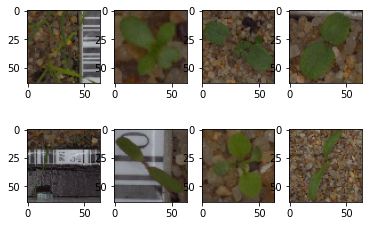

In [36]:
# Displaying some images from dataset
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(X[i])

In [7]:
# Displaying the categories
listing = os.listdir('/content/drive/MyDrive/Colab Notebooks/Data/train/')
print(f'Total no. of categories : {len(listing)}')
print ('Names of the categories : ')
images_count = [];
for imgFolder in listing:
  print(imgFolder)
  path=os.path.join('/content/drive/MyDrive/Colab Notebooks/Data/train/',imgFolder)
  number_of_images = len(os.listdir(path))
  images_count.append(number_of_images)

Total no. of categories : 12
Names of the categories : 
Scentless Mayweed
Maize
Fat Hen
Cleavers
Small-flowered Cranesbill
Common wheat
Shepherds Purse
Common Chickweed
Loose Silky-bent
Sugar beet
Black-grass
Charlock


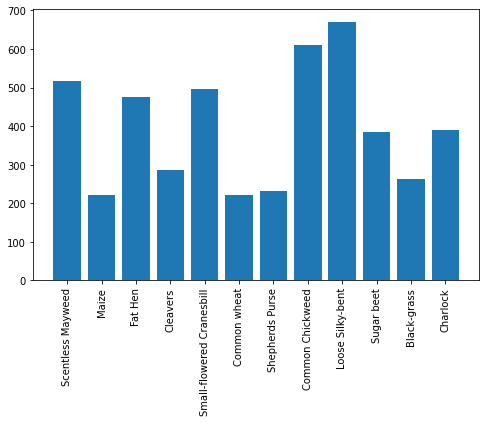

In [8]:
# Displaying the counts of image data under each category
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
ax.bar(listing,images_count)
plt.xticks(rotation = 90)
plt.show()

In [9]:
X.shape

(4750, 64, 64, 3)

In [10]:
y.shape

(4750, 12)

# **2. Design, train, tune and test the best AIML image classifier model using:**

• Supervised learning algorithms
• Neural networks
• CNN


Data is flattened or reshaped to apply various Methods

In [11]:
X_reshaped = X.reshape(4750, 12288) # 12288 is from the shape of X (i.e 64 * 64 * 3)  

In [12]:
y_reshaped = np.argmax(y,axis=1)

In [13]:
# Test/Train Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.33, random_state=42)

## **Supervised Machine Learning**

## SVM

In [14]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [15]:
print('SVM Train Score', svc.score(X_train,y_train))
print('SVM Test Score', svc.score(X_test,y_test))

SVM Train Score 0.8412947831552483
SVM Test Score 0.45471938775510207


## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [17]:
print('Logistic Regression Train Score ', lr.score(X_train,y_train))
print('Logistic Regression Test Score ', lr.score(X_test,y_test))

Logistic Regression Train Score  0.9176618478944061
Logistic Regression Test Score  0.4719387755102041


## Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [19]:
print('Naive Bayes Train Scores', mnb.score(X_train,y_train))
print('Naive Bayes Test Scores', mnb.score(X_test,y_test))

Naive Bayes Train Scores 0.3903205531112508
Naive Bayes Test Scores 0.31313775510204084


## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
print('Decision Tree Train Score', dt.score(X_train,y_train))
print('Decision Tree Test Score', dt.score(X_test,y_test))

Decision Tree Train Score 1.0
Decision Tree Test Score 0.25637755102040816


## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
print('Random Forest Train Score', rf.score(X_train,y_train))
print('Random Forest Test Score', rf.score(X_test,y_test))

Random Forest Train Score 1.0
Random Forest Test Score 0.4942602040816326


## AdaBoosting / Adaptive Boosting 

In [24]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)

AdaBoostClassifier()

In [25]:
print('AdaBoosting Train Score',ab.score(X_train,y_train))
print('AdaBoosting Test Score', ab.score(X_test,y_test))

AdaBoosting Train Score 0.3020113136392206
AdaBoosting Test Score 0.28380102040816324


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

In [ ]:
print('Gradient Boosting Train Score', gb.score(X_train,y_train))
print('Gradient Boosting Test Score', gb.score(X_test,y_test))

Gradient Boosting takes etremely longer time (More than and hour and so skipping its operation)

## XGBoost

In [30]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [31]:
print('XGBoost Train Score', xgb.score(X_train,y_train))
print('XGBoost Test Score', xgb.score(X_test,y_test))

XGBoost Train Score 0.994343180389692
XGBoost Test Score 0.5924744897959183


Of all the above applied Supervised Learning Methods **"XGBoost"** gives the high accuracy **"59%"**

## **Neural Network**

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import regularizers,optimizers

In [41]:
X_reshaped = X.reshape(4750,12288) # 12288 = 64*64*3

In [42]:
# Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.33, random_state=42)

In [43]:
def tune_model_nn(iterations,lr):
  iterations=iterations
  learning_rate = lr
  hidden_nodes = 6150
  output_nodes=12

  nn_model1 = Sequential()
  nn_model1.add(Dense(hidden_nodes,input_shape=(12288,),activation='relu'))
  nn_model1.add(BatchNormalization())
  nn_model1.add(Dropout(0.2))
  nn_model1.add(Dense(output_nodes,activation='softmax'))

  adam = optimizers.Adam(learning_rate=learning_rate)

  nn_model1.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
  nn_model1.fit(X_train,y_train,epochs=iterations,validation_data=(X_test,y_test),batch_size=50)

  score = nn_model1.evaluate(X_train,y_train,verbose=0)
  return score

Checking the accuracy and learning rate with 10 iteration and 10 epoch

In [44]:
for k in range(1,11):
  learning_rate = math.pow(10,np.random.uniform(-7,-4))
  tune_model_nn(10,learning_rate)
  print("Learning rate : {}".format(learning_rate))
  print("End of {} iteration".format(k))

Epoch 1/10
64/64 [==============================] - 45s 690ms/step - loss: 2.7658 - accuracy: 0.1383 - val_loss: 2.4412 - val_accuracy: 0.1633
Epoch 2/10
64/64 [==============================] - 46s 724ms/step - loss: 2.2144 - accuracy: 0.2678 - val_loss: 2.3691 - val_accuracy: 0.1728
Epoch 3/10
64/64 [==============================] - 44s 696ms/step - loss: 1.9755 - accuracy: 0.3548 - val_loss: 2.2831 - val_accuracy: 0.1811
Epoch 4/10
64/64 [==============================] - 45s 704ms/step - loss: 1.7757 - accuracy: 0.4092 - val_loss: 2.2028 - val_accuracy: 0.2366
Epoch 5/10
64/64 [==============================] - 45s 700ms/step - loss: 1.6055 - accuracy: 0.4877 - val_loss: 2.1233 - val_accuracy: 0.2468
Epoch 6/10
64/64 [==============================] - 44s 697ms/step - loss: 1.4866 - accuracy: 0.5314 - val_loss: 2.0309 - val_accuracy: 0.3138
Epoch 7/10
64/64 [==============================] - 44s 689ms/step - loss: 1.3834 - accuracy: 0.5607 - val_loss: 1.9321 - val_accuracy: 0.3514

Highest validation accuracy is '0.4273' it has learning rate of '6.802789302785341e-06'

In [45]:
# Defining callback for early stopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)

In [46]:
# Running the model with the Learning rate which is obtained in the above steps

iterations=30
learning_rate = 6.802789302785341e-06 
hidden_nodes = 6150
output_nodes=12

nn_model = Sequential()
nn_model.add(Dense(hidden_nodes,input_shape=(12288,),activation='relu'))
nn_model.add(BatchNormalization())
nn_model.add(Dropout(0.2))
nn_model.add(Dense(output_nodes,activation='softmax'))

adam = optimizers.Adam(learning_rate=learning_rate)

nn_model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
nn_model.fit(X_train,y_train,epochs=iterations,validation_data=(X_test,y_test),batch_size=50,callbacks=[callback])

Epoch 1/30
64/64 [==============================] - 47s 727ms/step - loss: 2.5062 - accuracy: 0.2058 - val_loss: 2.4026 - val_accuracy: 0.1518
Epoch 2/30
64/64 [==============================] - 46s 720ms/step - loss: 1.7336 - accuracy: 0.4287 - val_loss: 2.2370 - val_accuracy: 0.2047
Epoch 3/30
64/64 [==============================] - 46s 720ms/step - loss: 1.4369 - accuracy: 0.5471 - val_loss: 2.1000 - val_accuracy: 0.2774
Epoch 4/30
64/64 [==============================] - 46s 720ms/step - loss: 1.2301 - accuracy: 0.6213 - val_loss: 1.9902 - val_accuracy: 0.3399
Epoch 5/30
64/64 [==============================] - 47s 735ms/step - loss: 1.0500 - accuracy: 0.6864 - val_loss: 1.8343 - val_accuracy: 0.3865
Epoch 6/30
64/64 [==============================] - 47s 733ms/step - loss: 0.9445 - accuracy: 0.7357 - val_loss: 1.9228 - val_accuracy: 0.3654
Epoch 7/30
64/64 [==============================] - 46s 716ms/step - loss: 0.8468 - accuracy: 0.7574 - val_loss: 1.7343 - val_accuracy: 0.4158

Accuracy of '45%' from the Neural Network model

## **CNN**

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization,Conv2D,MaxPooling2D
from tensorflow.keras import regularizers,optimizers

In [48]:
# Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
# 3 Convolution (8,16 and 32) will be created with 128 neurons in hidden layer 12 neurons in the output layer
def cnn_model_function(n,lr):
  epochs = n
  lr = lr
  cnn_model1 = Sequential()
  cnn_model1.add(Conv2D(filters=8,kernel_size=3,activation='relu',input_shape=(64,64,3)))
  cnn_model1.add(MaxPooling2D(pool_size=(2,2)))
  cnn_model1.add(BatchNormalization())
  cnn_model1.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
  cnn_model1.add(MaxPooling2D(pool_size=(2,2)))
  cnn_model1.add(BatchNormalization())
  cnn_model1.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
  cnn_model1.add(Flatten())
  cnn_model1.add(Dense(128,activation='relu'))
  cnn_model1.add(Dense(12,activation='softmax'))
  optimizer = optimizers.Adam(learning_rate = lr)
  cnn_model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
  cnn_model1.fit(x=X_train, y=y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

CNN is set to operate with 20 iterations and 10 epoch to obtain the learning rate for the validation accuracy

In [52]:
for k in range(1,21):
  learning_rate = math.pow(10,np.random.uniform(-7,-4))
  cnn_model_function(10,learning_rate)
  print("Learning rate : {}".format(learning_rate))
  print("End of {} iteration".format(k))

Epoch 1/10
100/100 [==============================] - 28s 270ms/step - loss: 2.6295 - accuracy: 0.0773 - val_loss: 2.4599 - val_accuracy: 0.1065
Epoch 2/10
100/100 [==============================] - 27s 268ms/step - loss: 2.6137 - accuracy: 0.0842 - val_loss: 2.4528 - val_accuracy: 0.1084
Epoch 3/10
100/100 [==============================] - 28s 276ms/step - loss: 2.5981 - accuracy: 0.0845 - val_loss: 2.4587 - val_accuracy: 0.1231
Epoch 4/10
100/100 [==============================] - 26s 257ms/step - loss: 2.5855 - accuracy: 0.0921 - val_loss: 2.4742 - val_accuracy: 0.1186
Epoch 5/10
100/100 [==============================] - 26s 264ms/step - loss: 2.5732 - accuracy: 0.0959 - val_loss: 2.4944 - val_accuracy: 0.1065
Epoch 6/10
100/100 [==============================] - 26s 261ms/step - loss: 2.5653 - accuracy: 0.1006 - val_loss: 2.5161 - val_accuracy: 0.1020
Epoch 7/10
100/100 [==============================] - 28s 276ms/step - loss: 2.5576 - accuracy: 0.1003 - val_loss: 2.5307 - val_ac

Highest validation accuracy is '0.6429' it has learning rate of '4.4904248254227866e-05'

In [53]:
# Defining callback for early stopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)

In [54]:
epochs=30
lr = 4.4904248254227866e-05
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=8,kernel_size=3,activation='relu',input_shape=(64,64,3)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dense(12,activation='softmax'))
optimizer = optimizers.Adam(learning_rate = lr)
cnn_model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
cnn_model.fit(x=X_train, y=y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test),callbacks=[callback])

Epoch 1/30
100/100 [==============================] - 10s 94ms/step - loss: 2.3740 - accuracy: 0.1845 - val_loss: 2.4534 - val_accuracy: 0.1161
Epoch 2/30
100/100 [==============================] - 9s 93ms/step - loss: 1.9949 - accuracy: 0.3592 - val_loss: 2.5338 - val_accuracy: 0.1199
Epoch 3/30
100/100 [==============================] - 9s 93ms/step - loss: 1.6581 - accuracy: 0.4909 - val_loss: 2.5498 - val_accuracy: 0.1556
Epoch 4/30
100/100 [==============================] - 9s 93ms/step - loss: 1.3541 - accuracy: 0.5968 - val_loss: 2.1707 - val_accuracy: 0.3221
Epoch 5/30
100/100 [==============================] - 9s 92ms/step - loss: 1.1235 - accuracy: 0.6631 - val_loss: 1.7274 - val_accuracy: 0.4062
Epoch 6/30
100/100 [==============================] - 9s 92ms/step - loss: 0.9506 - accuracy: 0.7146 - val_loss: 1.4104 - val_accuracy: 0.5344
Epoch 7/30
100/100 [==============================] - 9s 92ms/step - loss: 0.8129 - accuracy: 0.7627 - val_loss: 1.1830 - val_accuracy: 0.610

Accuracy for CNN is '**72%**' 

# **3. Compare the results from the above step along with your detailed observations on the best performing algorithm and why/how it outperforms other algorithms in this case.**

Method             | Accuracy 
-------------------|------------------
Logistic Regression| 47%
Naive Bayes| 31%
Decision Tree | 25%
Random Forest | 49%
AdaBoosting | 28%
XGBoost | 59%
Neural Network | 45%
CNN | 72%




1.   Of all the Supervised Learning methods XGBoost has high accuracy of 59% 
2.  Neural Network has accuracy of 45%
3. And the best out of all the method in this case is obtained for Convolutional Neural Network with accuracy 72%



# **4. Pickle the best performing model.**

Joblib library is easy and efficient. Since I have already tried that during my neural network project. Using model.save in this project. 

In [55]:
cnn_model.save('/content/drive/MyDrive/Colab Notebooks/Pickles/CV-CNN/cnn_model.pkl')
cnn_model.save_weights('/content/drive/MyDrive/Colab Notebooks/Pickles/CV-CNN/cnn_model_weights.pkl')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Pickles/CV-CNN/cnn_model.pkl/assets


# **5. Import the the test image [ from the “ Prediction” folder ] to predict the class. Display the image. Use the best trained image classifier model to predict the class.**

In [56]:
# Importing from the pickled model

from tensorflow.keras.models import load_model

pickled_model = load_model('/content/drive/MyDrive/Colab Notebooks/Pickles/CV-CNN/cnn_model.pkl')
pickled_model.load_weights('/content/drive/MyDrive/Colab Notebooks/Pickles/CV-CNN/cnn_model_weights.pkl')

In [57]:
test_data = datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Data/',target_size=(64,64),classes=['Seedling - Prediction'])

Found 1 images belonging to 1 classes.


In [58]:
X,y = next(test_data)

In [59]:
# Shape 
X.shape

(1, 64, 64, 3)

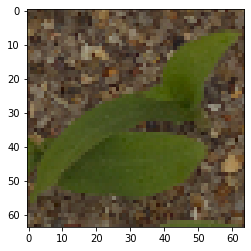

In [60]:
# Reshape
plt.imshow(X.reshape(64,64,3));

In [61]:
# Listing all categories
data.class_indices

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

In [62]:
# Actual Prediction
np.argmax(pickled_model.predict(X))

7

# Actual Prediction points to index 7 and as per the indices it is **Maize**